In [6]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks/libro_principito"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
el_principito.txt  Principito.ipynb


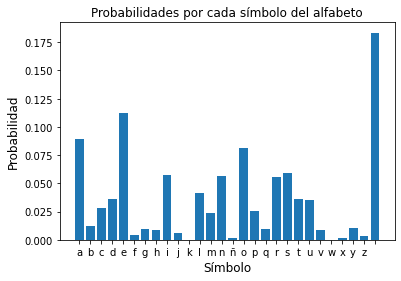

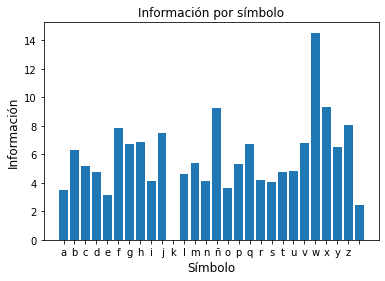

La información promedio de cada símbolo es de (Entropía): 4.006046519808105 bits
La longitud del libro es: 71565 símbolos
La información promedio contenida por esta fuente de información es 35.83658989875838 kB


In [7]:
import math

def read_book(url):
   # Leemos el libro con una url y regresamos el contenido 
   file = open(url,"r",encoding='UTF-8')
   content = list()
   if file.mode == 'r':
       content = file.read()
  
   return content

   ABC=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z',' ']

   # Contará cuántas veces aparece cada símbolo a lo largo del libro.
def probability_per_symbol(book,alphabeat):
  
   # Tamaño de nuestro alfabeto
   size = len(alphabeat)

   # Tamaño del libro (total de caracteres)
   bookSize = len(book)

   # Vector donde guardaremos la probabilidad de cada símbolo
   Probability = np.zeros(size)

   for i in range(size):
       reps = 0
       # Símbolo actual en que contará las repeticiones
       current_symbol = alphabeat[i]
       for j in range(bookSize):
           # Símbolo con el que lo comparará
           symbol = book[j]

           #Si son iguales entonces ha aparecido y se suma el contador
           if symbol == current_symbol:
               reps+=1
      
       # Asigna la probabilidad de aparición del símbolo en turno
       Probability[i] = reps/bookSize
  
   return Probability

def information_per_symbol(Probability, size_alphabet):

 # Vector vacío de información por símbolo
 Information = np.zeros(size_alphabet)

 #Recorremos todo el alfabeto
 for i in range(size_alphabet):
     p_by_symbol = Probability[i]
     # Se calcula la información de cada símbolo
     if p_by_symbol != 0:
         Information[i] = math.log2(1/p_by_symbol)
     else:
         Information[i] = 0

 return Information

def calc_entropy(Probability, Information):
   # Vector de entropía vacío
   h = np.zeros(len(Probability))

   # Cálculo de entropía que es la probabilidad del símbolo por la información de cada símbolo
   for i in range(len(Probability)):
       h[i]=Probability[i]*Information[i]
  
   # Se realiza la suma para acumular el cálculo de la entropía
   H = sum(h)

   return H
def plot_bar_Probabilities(alphabeat,probabilities):
     # this is for plotting purpose
     index = np.arange(len(alphabeat))
     plt.figure(1)
     plt.bar(index, probabilities)
     plt.xlabel('Símbolo', fontsize=12)
     plt.ylabel('Probabilidad', fontsize=12)
     plt.xticks(index, alphabeat, fontsize=10)
     plt.title('Probabilidades por cada símbolo del alfabeto')

def plot_bar_Information(alphabeat,Information):
     # this is for plotting purpose
     plt.figure(2)
     index = np.arange(len(alphabeat))
     plt.bar(index, Information)
     plt.xlabel('Símbolo', fontsize=12)
     plt.ylabel('Información', fontsize=12)
     plt.xticks(index, alphabeat, fontsize=10)
     plt.title('Información por símbolo')
import numpy as np
import matplotlib.pyplot as plt

# Leemos el libro  
book = read_book("/content/drive/My Drive/Colab Notebooks/libro_principito/el_principito.txt")  
  
# Tamaño del libro  
bookSize = len(book)  
  
# Alfabeto  
ABC=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z',' ']  
  
# Tamaño del alfabeto  
size_alphabet = len(ABC)  
  
# Vector de probabilidad por símbolo  
Probability = probability_per_symbol(book, ABC)  
  
# Vector de información por símbolo  
Information = information_per_symbol(Probability,size_alphabet)  
  
# Entropía en bits  
H = calc_entropy(Probability, Information)  
  
# Gráficas  
plot_bar_Probabilities(ABC, Probability)  
plot_bar_Information(ABC, Information)  
plt.show()  
  
# Análisis de entropía del libro  
print(f"La información promedio de cada símbolo es de (Entropía): {H} bits")  
print(f"La longitud del libro es: {bookSize} símbolos")  
print(f"La información promedio contenida por esta fuente de información es {bookSize*H / 8000} kB")